In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Generate data

1. A random sensing matrix with i.i.d. entries sampled from $\mathcal{N}(0, 1)$, $\mathbf{X} \in \mathbb{R}^{m \times d}$

2. $\boldsymbol{\xi} \in \mathbb{R}^{m}$ be a noise vector, independent of $\mathbf{X}$, with i.i.d. entries sampled from $\mathcal{N}(0, 1)$.
3. $\Theta = \{0, 1\}^{d}$ (signal space) and $\boldsymbol{\theta} \in \Theta$ (signal) be chosen uniformly at random and be independent of the pair $(\mathbf{X}, \boldsymbol{\xi})$.
4. Measurement vector $\mathbf{y} \in \mathbb{R}^{m}$

$$\mathbf{y} = \mathbf{X}\boldsymbol{\theta} + \boldsymbol{\xi}$$

In [2]:
def generate_data(m, d):
  X = np.random.randn(m, d)  # Sensing matrix
  xi = np.random.randn(m)   # Noise
  theta = np.random.randint(2, size=d)  # Signal
  y = X @ theta + xi  # Measurements
  return X, y, theta

## Define the likelihood and energy functions

The maximum likelihood estimate of $\boldsymbol{\theta}$ is given by the value $\widehat{\boldsymbol{\theta}} \in \Theta$ that minimizes the function

$$H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}) = -(\mathbf{y} - \mathbf{X}\boldsymbol{\theta})^{\top}(\mathbf{y} - \mathbf{X}\boldsymbol{\theta})$$

given the observations $(\mathbf{X}, \mathbf{y})$.

In [4]:
def H(X, y, theta):
  return -(y - X @ theta).T @ (y - X @ theta)

## Metropolis-Hastings algorithm

1. Set $\boldsymbol{\theta}_0 = \bar{\boldsymbol{\theta}}$.
2. For $t = 1, 2, \ldots, N - 1$:
   1. Pick $i$ uniformly at random in $\{1, 2, \ldots, d\}$.
   2. Let the proposed state be $\boldsymbol{\theta}^* \in \Theta$, with entries
      $\boldsymbol{\theta}^*(j) = \begin{cases}
          \boldsymbol{\theta}^{t-1}(j) & \text{if } j \neq i \\
          1 - \boldsymbol{\theta}^{t-1}(j) & \text{if } j = i
      \end{cases} \text{ for } j = 1, 2, \ldots, d.$
   3. Set
      $\boldsymbol{\theta}^t = \begin{cases}
          \boldsymbol{\theta}^* & \text{with probability } \min\left\{1, \frac{\exp\{-\beta H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}^*)\}}{\exp\{-\beta H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}^{t-1})\}}\right\} \\
          \boldsymbol{\theta}^{t-1} & \text{with probability } 1 - \min\left\{1, \frac{\exp\{-\beta H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}^*)\}}{\exp\{-\beta H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}^{t-1})\}}\right\}
      \end{cases}.$

In [ ]:
def metropolis_hastings(X, y, beta, N, initial_theta):
  d = len(initial_theta)
  theta = initial_theta.copy()
  trajectory = [theta.copy()]

  for _ in range(N):
    i = np.random.randint(d)
    theta_star = theta.copy()
    theta_star[i] = 1 - theta_star[i]

    acceptance_ratio = np.exp(-beta * (H(X, y, theta_star) - H(X, y, theta)))

    if np.random.rand() < acceptance_ratio:
      theta = theta_star.copy()

    trajectory.append(theta.copy())

  # Return the last state as the estimate
  return trajectory[-1]  

## Result

$$H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}) = (\mathbf{y} - \mathbf{X}\boldsymbol{\theta})^{\top}(\mathbf{y} - \mathbf{X}\boldsymbol{\theta})$$

<ipython-input-4-da0ed6dd47f1>:24: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(-beta * (H(X, y, theta_star) - H(X, y, theta)))


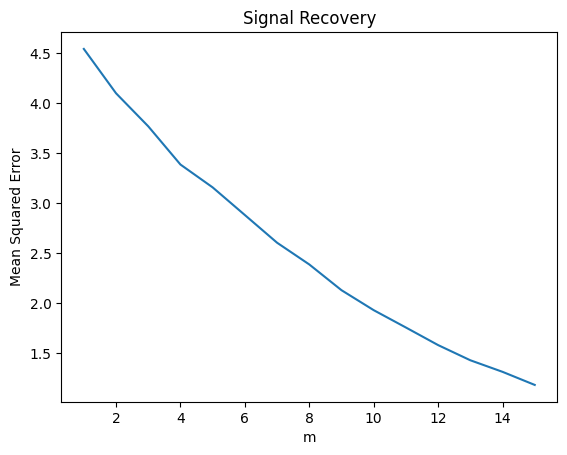

In [ ]:
d = 10  # Signal dimension
M = 10000  # Number of realizations
beta = 100  # Inverse temperature parameter
N = 1000  # Number of Metropolis-Hastings steps

ms = range(1, 16)  # Range of measurement numbers
MSEs = []

for m in ms:
    mse = 0
    for _ in range(M):
      X, y, true_theta = generate_data(m, d)
      initial_theta = np.random.randint(2, size=d)
      theta_hat = metropolis_hastings(X, y, beta, N, initial_theta)
      mse += ((theta_hat - true_theta) @ (theta_hat - true_theta)) / M
    MSEs.append(mse)

# Plot
plt.plot(ms, MSEs)
plt.xlabel("m")
plt.ylabel("Mean Squared Error")
plt.title("Signal Recovery")
plt.show()

In [ ]:
# Min
min_mse = min(MSEs)
print("min of MSE: ", min_mse)

min of MSE:  1.1839999999999251


$$H(\mathbf{X}, \mathbf{y}; \boldsymbol{\theta}) = -(\mathbf{y} - \mathbf{X}\boldsymbol{\theta})^{\top}(\mathbf{y} - \mathbf{X}\boldsymbol{\theta})$$

<ipython-input-1-fe227ae00ff7>:24: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(-beta * (H(X, y, theta_star) - H(X, y, theta)))


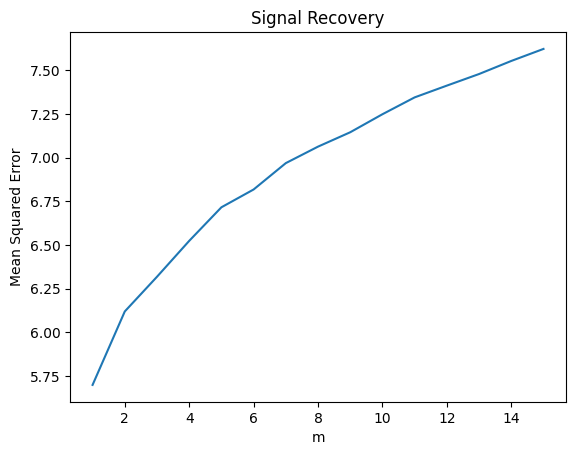

min of MSE:  5.698800000000218


In [ ]:
ms = range(1, 16)  # Range of measurement numbers
MSEs = []

for m in ms:
    mse = 0
    for _ in range(M):
      X, y, true_theta = generate_data(m, d)
      initial_theta = np.random.randint(2, size=d)
      theta_hat = metropolis_hastings(X, y, beta, N, initial_theta, flag=False)
      mse += ((theta_hat - true_theta) @ (theta_hat - true_theta)) / M
    MSEs.append(mse)

# Plot
plt.plot(ms, MSEs)
plt.xlabel("m")
plt.ylabel("Mean Squared Error")
plt.title("Signal Recovery")
plt.show()

# Min
min_mse = min(MSEs)
print("min of MSE: ", min_mse)